##

In [32]:
import torch
import torch.nn as nn
import torch.optim as optim

from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [33]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

In [35]:
train_dataset = datasets.FashionMNIST(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

test_dataset = datasets.FashionMNIST(
    root='./data',
    train=False,
    download=True,
    transform=transform
)


In [36]:
train_loader = DataLoader(
    train_dataset,
    batch_size=64,
    shuffle=True
)
test_loader = DataLoader(
    test_dataset,
    batch_size=64,
    shuffle=False
)


In [37]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()

        self.features = nn.Sequential(
            nn.Conv2d(
                in_channels=1,
                out_channels=32,
                kernel_size=3,
                stride=1,
                padding=1
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(
                in_channels=32,
                out_channels=64,
                kernel_size=3,
                stride=1,
                padding=1
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )


        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64 * 7 * 7, 128),
            nn.ReLU(),
            nn.Linear(128, 10)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

In [38]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [39]:
model = CNN().to(device)

criterion = nn.CrossEntropyLoss()

optimizer = optim.Adam(
    model.parameters(),
    lr=0.001
)

In [40]:
epochs = 5
for epoch in range(epochs):
    model.train()
    total_loss = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch [{epoch+1}/{epochs}], Loss: {total_loss/len(train_loader):.4f}")

Epoch [1/5], Loss: 0.4281
Epoch [2/5], Loss: 0.2777
Epoch [3/5], Loss: 0.2291
Epoch [4/5], Loss: 0.1990
Epoch [5/5], Loss: 0.1705


In [41]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        output = model(images)
        _, predicted = torch.max(output, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

print(f"Test Accuracy: {100 * correct / total:.2f}%")

Test Accuracy: 91.91%


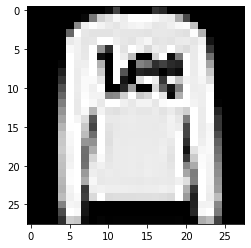

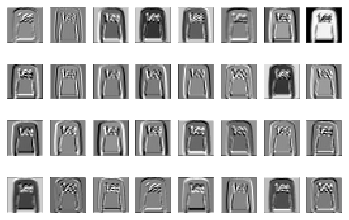

In [47]:
import matplotlib.pyplot as plt


image, label = test_dataset[1]
plt.imshow(image.squeeze(), cmap="gray")
plt.show()

model.eval()

with torch.no_grad():
    x = image.unsqueeze(0).to(device)  # (1,1,28,28)
    feature_maps = model.features[0](x)  # فقط Conv اول
    feature_maps = feature_maps.squeeze().cpu().detach().numpy()
    for i in range(feature_maps.shape[0]):
        plt.subplot(4, 8, i + 1)
        plt.imshow(feature_maps[i], cmap="gray")
        plt.axis("off")
    plt.show()